<a href="https://colab.research.google.com/github/nadhifahlutfiyah/PCVK_GENAP_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nadhifah Lutfiyah Mahmudah**

**2041720082**

**TI - 3B / 12**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

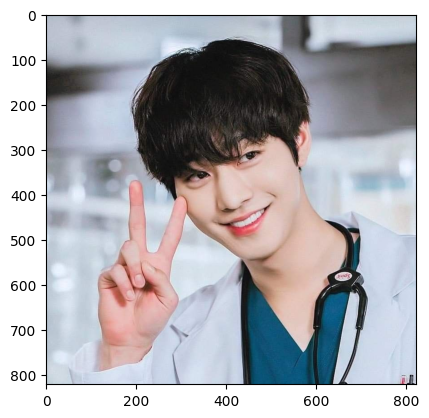

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ahs.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

**KONVOLUSI**

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # proses konvolusi
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image

GRAY

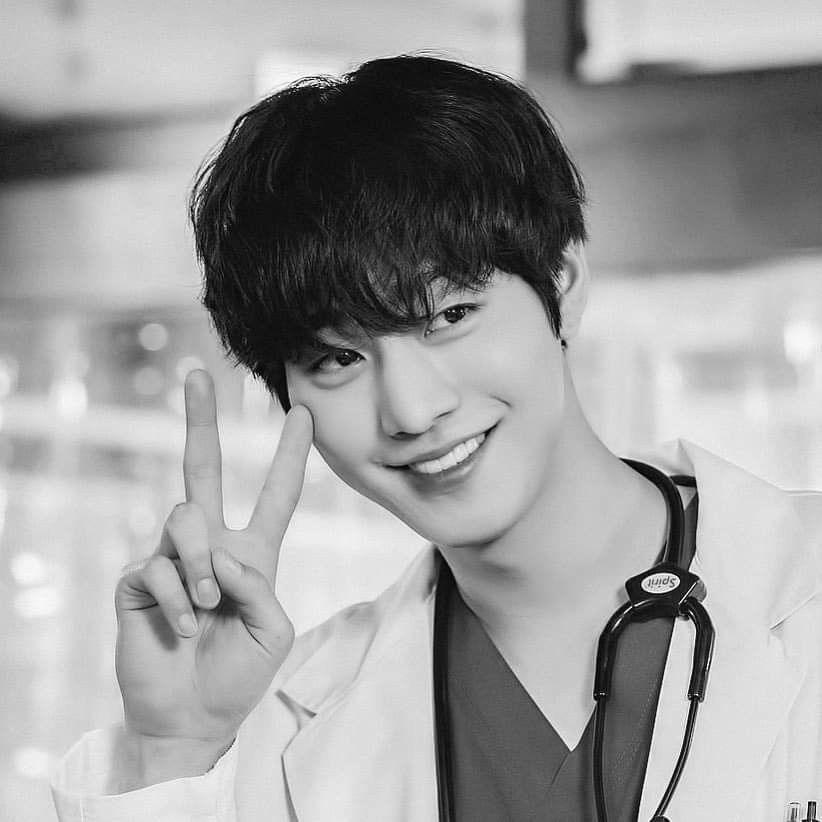

In [ ]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

**MEAN FILTERING**

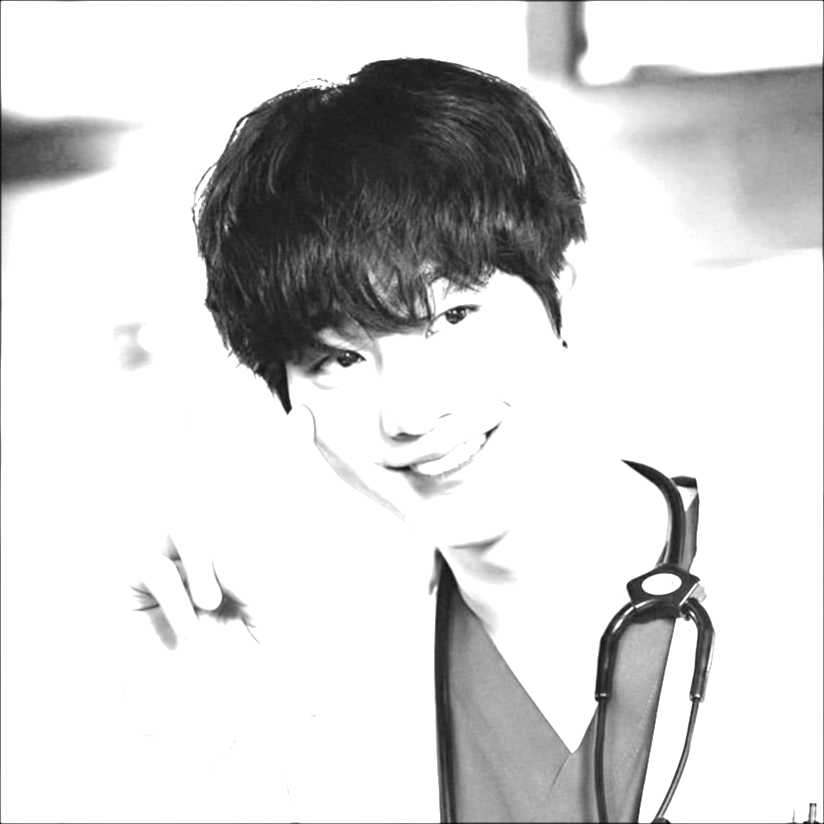

In [ ]:
# harus memiliki matriks yang bernilai ganjil (3x3) 
# piksel utama -> nilai mean dari piksel lain dibagi hasil kali matriks (3x3) 
# hasil mean tsb menggantikan piksel utama lama

kernel_mean = np.array([[1/5,1/5,1/5],
                       [1/5,1/3,1/5],
                       [1/5,1/5,1/5]])

cv2_imshow(convolution2d(img_gray, kernel_mean, 1,2))

**MEDIAN FILTERING**

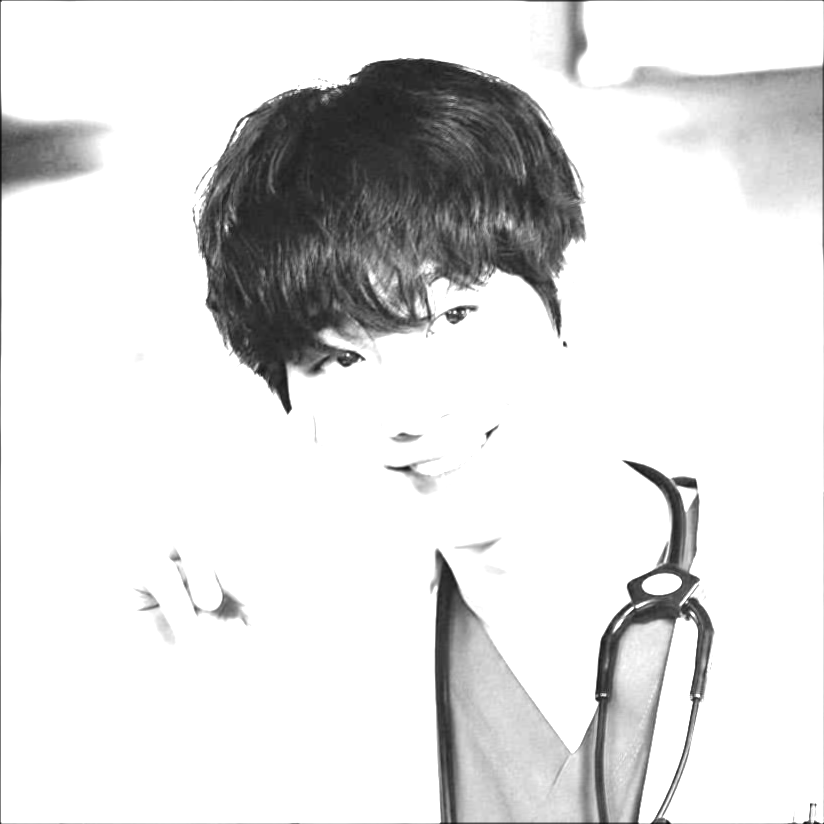

In [ ]:
# matriks berukuran 1x(NxN) -> 1x(3x3)
# harus diurutkan dulu (disusun kecil->besar)
# hasil median menggantikan nilai piksel di tengah (piksel utama)

kernel_median = np.array([[1/5,1/2,1/5],
                       [1/2,1/9,1/5],
                       [1/3,1/5,1/5]])

cv2_imshow(convolution2d(img_gray, kernel_median, 1,2))

**MODUS FILTERING**

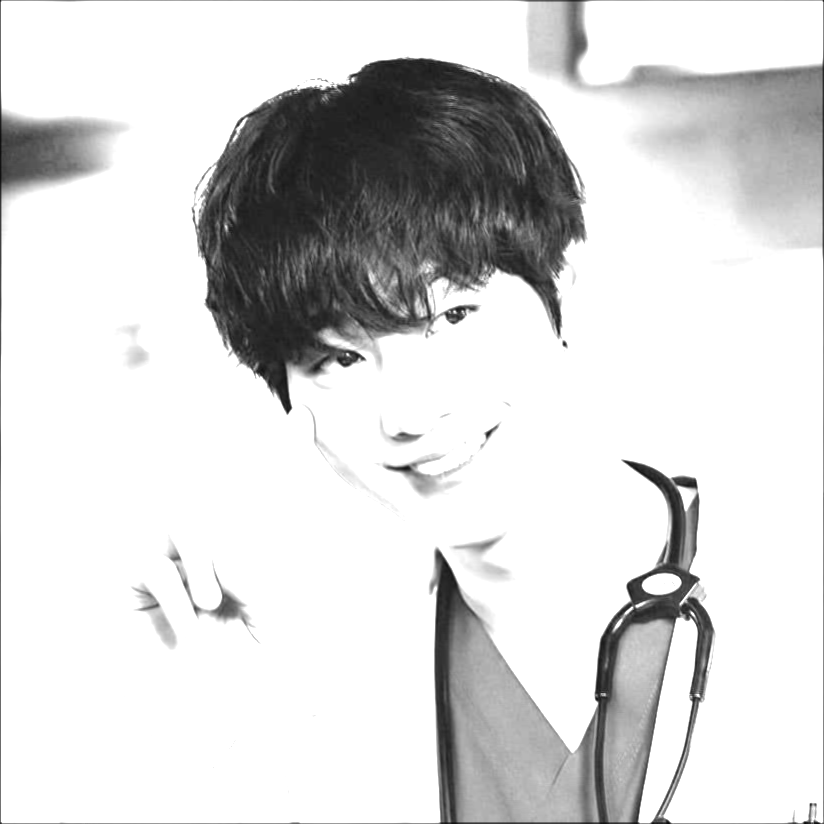

In [ ]:
# matriks berukuran  1x(NxN) -> 1x(3x3) 
# harus diurutkan dulu (disusun kecil-> besar)
# hasil modus menggantikan nilai piksel di tengah (piksel tama)

kernel_modus = np.array([[1/3,1/7,1/5],
                       [1/7,1/4,1/7],
                       [1/7,1/2,1/5]])

cv2_imshow(convolution2d(img_gray, kernel_modus, 1,2))

**LOW-PASS FILTERING**

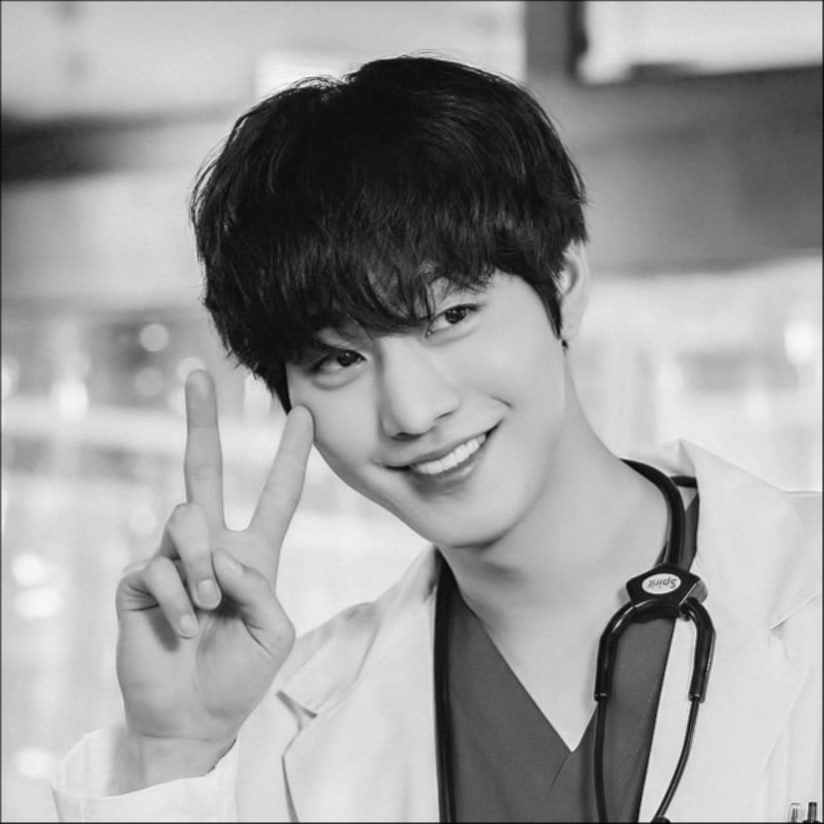

In [ ]:
# citra jadi lebih halus dan blur
# semua nilai harus positif
# jumlah semua nilai harus 1

kernel_low = np.array([[0.09,0.03,0.08],
                       [0.05,0.11,0.2],
                       [0.12,0.17,0.15]])

cv2_imshow(convolution2d(img_gray, kernel_low, 1,2))

**HIGH-PASS FILTERING**

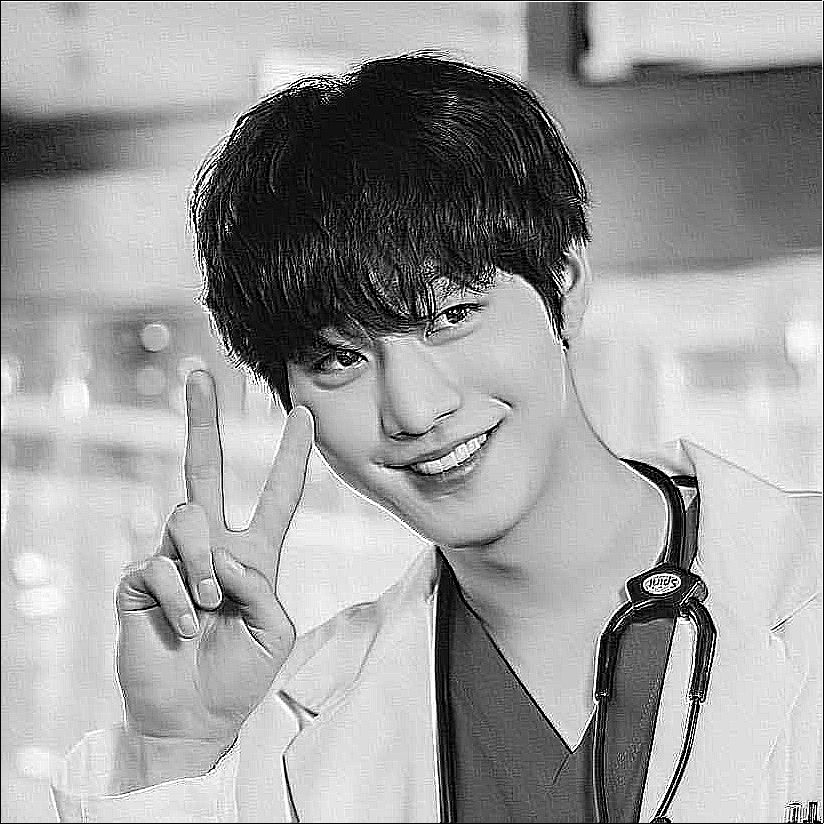

In [ ]:
# mempertajam tepi objek
# nilai boleh positif, negatif, atau nol
# jumlah semua nilai = 0 atau = 1

kernel_high = np.array([[1,-2,-2],
                       [-2,5,1],
                       [1,1,-2]])

cv2_imshow(convolution2d(img_gray, kernel_high, 1,2))